In [1]:
import networkx as nx
import pandas as pd
import random as rand
import numpy as np

In [2]:
class Agent():
    
    def __init__(self, opinion=0, frequency=1, max_frequency=5, status=None):
        
        self.opinion=opinion
        self.frequency=frequency
        self.max_frequency=frequency
        self.status=status        
        
        self.friends=[]
        self.next_opinion=None
        self.node_id=None
        
        self.post_history = []
        self.opinion_history = []
        
    def post():
        posts = {
            self.opinion:self.frequency
        }
        
        self.post_history.append(posts)
        
        return posts
    
    def change_opinion_friends(self, threshold=.5):
        opinions = []
        for friend in self.friends:
            opinions.append(friend.opinion)
        if np.mean(opinions) >= threshold:
            self.next_opinion = 1
        else:
            self.next_opinion = 0
            
    def update_opinion(self):
        if self.next_opinion != self.opinion:
            self.opinion=self.next_opinion
            
        self.opinion_history.append(self.opinion)        
        self.next_opinion=None
        
    
    def node_output(self):
        return (
            self.node_id,
            dict(
                opinion=self.opinion,
                frequency=self.frequency,
                status=self.status,
            )          
        )
    
    def tie_output(self):
        tie_list = []
        for friend in self.friends:
            tie_list.append((
                self.node_id,
                friend.node_id
            ))
            
        return tie_list

In [3]:
population = []

for i in range(50):
    random_op = rand.random()
    if random_op >= .5:
        op = 0
    else:
        op = 1
            
    freq = rand.randint(0, 3)
    mfreq = rand.randint(3, 8)
    agent = Agent(op, freq, mfreq)
    agent.node_id = i+1
    
    population.append(agent)

for agent in population:
    n_friends = rand.randint(0,10)
    
    while len(agent.friends) < n_friends:
        
        friend = rand.choice(population)
        if friend == agent:
            pass
        elif friend in agent.friends:
            pass
        else:
            agent.friends.append(friend)
            if agent not in friend.friends:
                friend.friends.append(agent)

In [181]:
for tick in range(1000):
    
    for agent in population:
        
        agent.change_opinion_friends(threshold=.5)
        agent.update_opinion()

In [182]:
node_list = []
tie_list = []
for agent in population:
    node_list.append(agent.node_output())
    tie_list.extend(agent.tie_output())

In [183]:
G = nx.DiGraph()

In [184]:
G.add_nodes_from(node_list)

In [185]:
G.add_edges_from(tie_list)

In [186]:
opinion = []
for node in G.nodes:
    opinion.append(G.nodes[node]['opinion'])

In [169]:
test = nx.spring_layout(G)

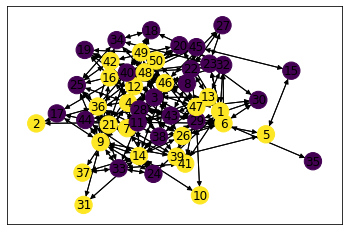

In [170]:
nx.draw_networkx(G, pos=test, arrows=True, node_color=opinion)

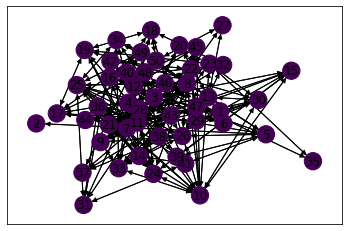

In [187]:
nx.draw_networkx(G, pos=test, arrows=True, node_color=opinion)